### California Housing Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ninja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#get data
cal_housing = pd.read_csv('cal_housing_clean.csv')

In [3]:
cal_housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
cal_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### Data should be cleaned already. We'll take a look anyway.

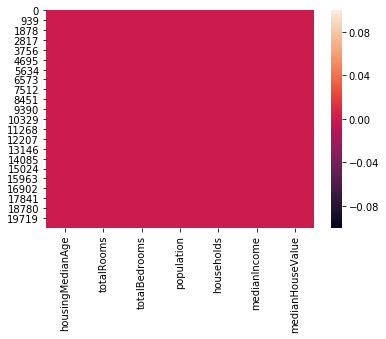

In [5]:
#check for missing data
sns.heatmap(cal_housing.isnull())

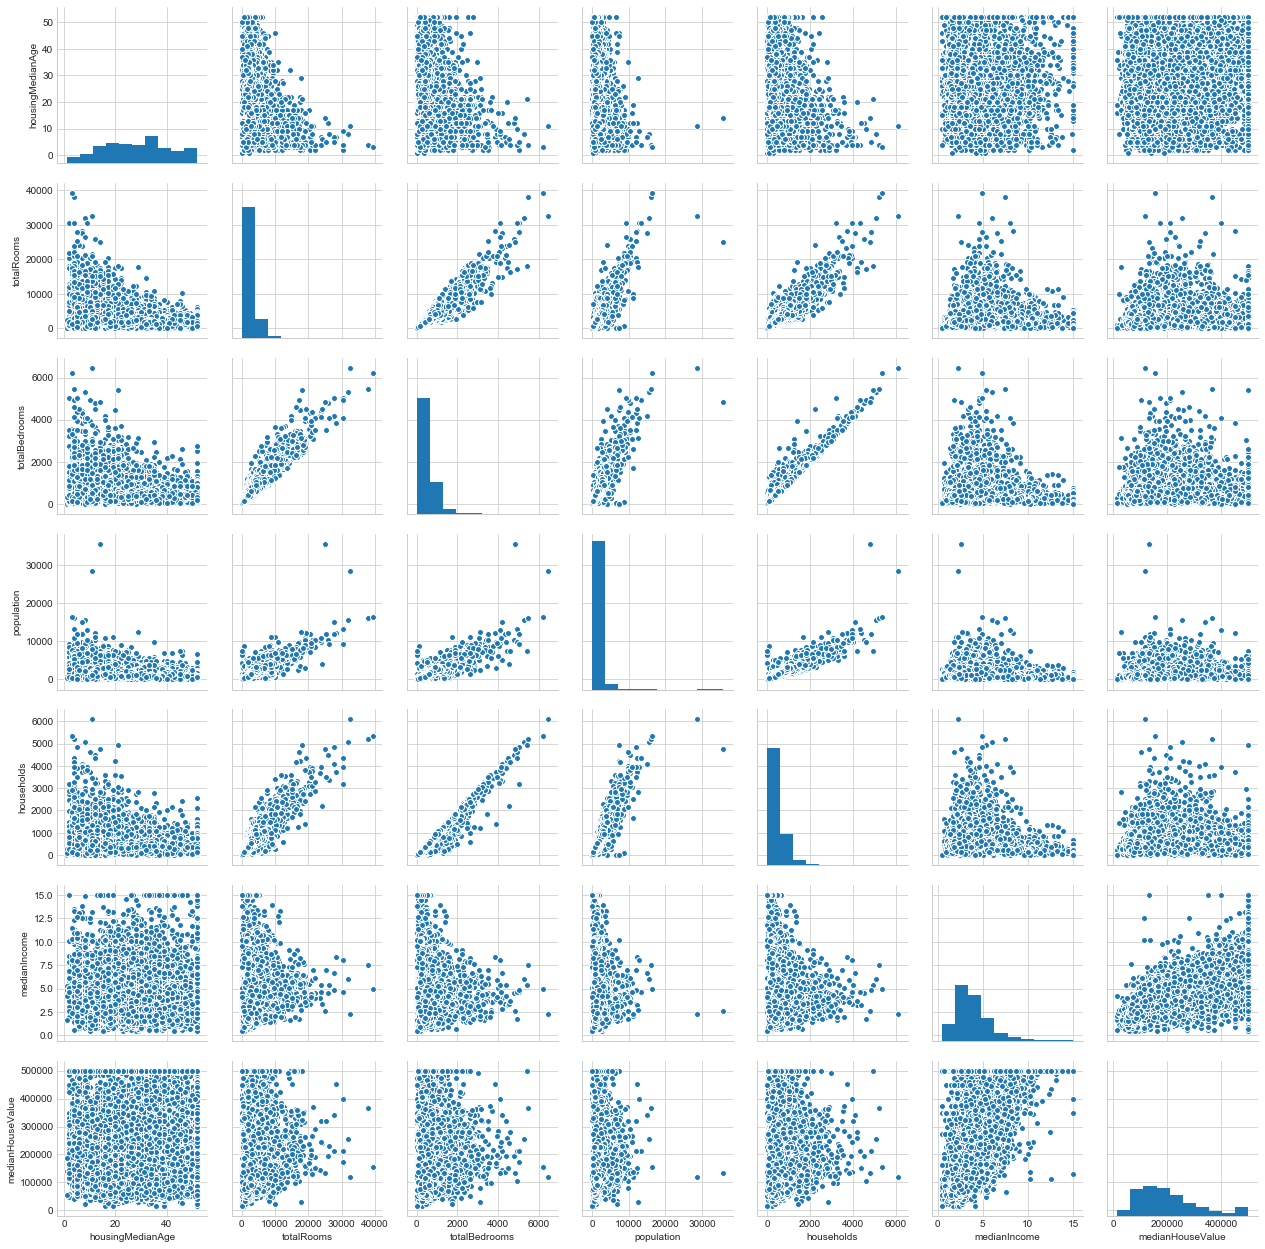

In [6]:
sns.set_style('whitegrid')
sns.pairplot(cal_housing)

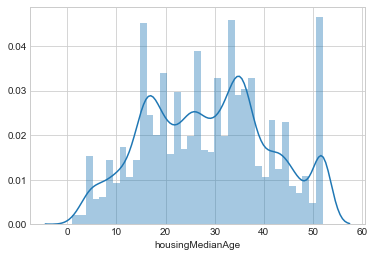

In [7]:
sns.distplot(cal_housing['housingMedianAge'])

### Prep data for modeling

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cal_housing.drop(['medianHouseValue'],axis=1), cal_housing['medianHouseValue'], test_size=0.3)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
#create instance of MinMax Scaler
scaler = MinMaxScaler()

In [12]:
#fit scaler to training data
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
#scales data but returns an array, not dataframe
scaled_X_train=scaler.transform(X_train)

In [15]:
#put scaled data back into a dataframe
X_train = pd.DataFrame(data=scaled_X_train,columns = X_train.columns,index=X_train.index)

In [17]:
scaled_X_test=scaler.transform(X_test)

In [19]:
X_test=pd.DataFrame(data=scaled_X_test,columns = X_test.columns,index=X_test.index)

In [20]:
X_train.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'],
      dtype='object')

In [21]:
#create feature columns for model
houseMedianAge=tf.feature_column.numeric_column('housingMedianAge')
totRooms=tf.feature_column.numeric_column('totalRooms')
totBedrooms=tf.feature_column.numeric_column('totalBedrooms')
pop=tf.feature_column.numeric_column('population')
household=tf.feature_column.numeric_column('households')
medIncome=tf.feature_column.numeric_column('medianIncome')

In [22]:
feat_columns=[houseMedianAge, totRooms, totBedrooms, pop, household, medIncome]

### Create and Train Model

In [72]:
#create input function for the estimator object
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [112]:
#create estimator model
model = tf.estimator.DNNRegressor(hidden_units=[6,10,10,10,6],feature_columns=feat_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ninja\\AppData\\Local\\Temp\\tmpdsgy1kw4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014DC33CB630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [113]:
#train model
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ninja\AppData\Local\Temp\tmpdsgy1kw4\model.ckpt.
INFO:tensorflow:loss = 454715700000.0, step = 1
INFO:tensorflow:global_step/sec: 181.442
INFO:tensorflow:loss = 135101720000.0, step = 101 (0.554 sec)
INFO:tensorflow:global_step/sec: 285.809
INFO:tensorflow:loss = 83703230000.0, step = 201 (0.350 sec)
INFO:tensorflow:global_step/sec: 301.725
INFO:tensorflow:loss = 106614735000.0, step = 301 (0.328 sec)
INFO:tensorflow:global_step/sec: 330.829
INFO:tensorflow:loss = 167378000000.0, step = 401 (0.302 sec)
INFO:tensorflow:global_step/sec: 309.768
INFO:tensorflow:loss = 87456915000.0, step = 501 (0.323 sec)
INFO:tensorflow:global_step/sec: 293.373
INFO:tensorflow:loss = 82764870000.0, step = 601 (0.341 s

INFO:tensorflow:global_step/sec: 328.26
INFO:tensorflow:loss = 71681180000.0, step = 7701 (0.305 sec)
INFO:tensorflow:global_step/sec: 347.393
INFO:tensorflow:loss = 93019050000.0, step = 7801 (0.303 sec)
INFO:tensorflow:global_step/sec: 309.322
INFO:tensorflow:loss = 48404750000.0, step = 7901 (0.308 sec)
INFO:tensorflow:global_step/sec: 307.448
INFO:tensorflow:loss = 51009032000.0, step = 8001 (0.325 sec)
INFO:tensorflow:global_step/sec: 325.502
INFO:tensorflow:loss = 28403294000.0, step = 8101 (0.307 sec)
INFO:tensorflow:global_step/sec: 284.104
INFO:tensorflow:loss = 34864333000.0, step = 8201 (0.354 sec)
INFO:tensorflow:global_step/sec: 311.247
INFO:tensorflow:loss = 78401585000.0, step = 8301 (0.323 sec)
INFO:tensorflow:global_step/sec: 341.446
INFO:tensorflow:loss = 21236085000.0, step = 8401 (0.289 sec)
INFO:tensorflow:global_step/sec: 301.338
INFO:tensorflow:loss = 39340550000.0, step = 8501 (0.339 sec)
INFO:tensorflow:global_step/sec: 332.873
INFO:tensorflow:loss = 5847009300

INFO:tensorflow:loss = 32106955000.0, step = 15601 (0.337 sec)
INFO:tensorflow:global_step/sec: 292.868
INFO:tensorflow:loss = 60573663000.0, step = 15701 (0.341 sec)
INFO:tensorflow:global_step/sec: 312.072
INFO:tensorflow:loss = 133003220000.0, step = 15801 (0.320 sec)
INFO:tensorflow:global_step/sec: 300.913
INFO:tensorflow:loss = 134756650000.0, step = 15901 (0.332 sec)
INFO:tensorflow:global_step/sec: 266.444
INFO:tensorflow:loss = 159147180000.0, step = 16001 (0.391 sec)
INFO:tensorflow:global_step/sec: 305.843
INFO:tensorflow:loss = 35583115000.0, step = 16101 (0.311 sec)
INFO:tensorflow:global_step/sec: 305.442
INFO:tensorflow:loss = 247590040000.0, step = 16201 (0.327 sec)
INFO:tensorflow:global_step/sec: 320.675
INFO:tensorflow:loss = 16705138000.0, step = 16301 (0.312 sec)
INFO:tensorflow:global_step/sec: 312.227
INFO:tensorflow:loss = 51623190000.0, step = 16401 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.257
INFO:tensorflow:loss = 32464712000.0, step = 16501 (0.330 se

### Predictions

In [114]:
#create prediction input function
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
            batch_size=10,num_epochs=1,shuffle=False)

In [115]:
#create prediction generator
#it returns generator objects so needs to be converted to a list
pred_gen = model.predict(input_fn=predict_input_func)

In [116]:
#convert to a list
predictions=list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ninja\AppData\Local\Temp\tmpdsgy1kw4\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [117]:
final_preds=[]
for predi in predictions:
    final_preds.append(predi['predictions'])

### Calculate RMSE

In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
mean_squared_error(y_test,final_preds)**0.5

78052.12862847035

In [120]:
# RMSE with different steps and NN layers
#1000 steps,[6,6,6] layers: 213982.62
#100000 steps, [6,6,6] layers: 90906.59
#10000 steps, [10,10,10] layers:98190.27
#10000 steps, [6,6,6,] layers:100292.96
#10000 steps, [6,6,6,6,6] layers: 78333.56
#20000 steps, [6,6,6,6,6,6] layers: 76937.22
#20000 steps, [6,10,10,10,6] layers:78052.12

### We'll try again but with Linear Regression to see if we can improve

In [121]:
model_lin_reg = tf.estimator.LinearRegressor(feature_columns=feat_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ninja\\AppData\\Local\\Temp\\tmp81fvrzob', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014DC3B18320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [134]:
model_lin_reg.train(input_fn=input_func,steps=100000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ninja\AppData\Local\Temp\tmp81fvrzob\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\ninja\AppData\Local\Temp\tmp81fvrzob\model.ckpt.
INFO:tensorflow:loss = 511063030000.0, step = 11001
INFO:tensorflow:global_step/sec: 222.218
INFO:tensorflow:loss = 721692900000.0, step = 11101 (0.450 sec)
INFO:tensorflow:global_step/sec: 325.541
INFO:tensorflow:loss = 359327070000.0, step = 11201 (0.307 sec)
INFO:tensorflow:global_step/sec: 339.863
INFO:tensorflow:loss = 583574700000.0, step = 11301 (0.294 sec)
INFO:tensorflow:global_step/sec: 318.939
INFO:tensorflow:loss = 433358770000.0, step = 11401 (0.314 sec)
INFO:tensorflow:global_step/sec: 351.558
INFO:tensorflow:loss = 863922100000.0

INFO:tensorflow:loss = 303025000000.0, step = 18401 (0.321 sec)
INFO:tensorflow:global_step/sec: 292.499
INFO:tensorflow:loss = 492154520000.0, step = 18501 (0.344 sec)
INFO:tensorflow:global_step/sec: 296.191
INFO:tensorflow:loss = 413228240000.0, step = 18601 (0.338 sec)
INFO:tensorflow:global_step/sec: 336.023
INFO:tensorflow:loss = 435800640000.0, step = 18701 (0.299 sec)
INFO:tensorflow:global_step/sec: 322.515
INFO:tensorflow:loss = 638826200000.0, step = 18801 (0.307 sec)
INFO:tensorflow:global_step/sec: 351.087
INFO:tensorflow:loss = 543650780000.0, step = 18901 (0.300 sec)
INFO:tensorflow:global_step/sec: 301.564
INFO:tensorflow:loss = 389492470000.0, step = 19001 (0.320 sec)
INFO:tensorflow:global_step/sec: 356.743
INFO:tensorflow:loss = 246986340000.0, step = 19101 (0.276 sec)
INFO:tensorflow:global_step/sec: 328.414
INFO:tensorflow:loss = 910584600000.0, step = 19201 (0.304 sec)
INFO:tensorflow:global_step/sec: 274.892
INFO:tensorflow:loss = 424366240000.0, step = 19301 (0.

INFO:tensorflow:global_step/sec: 249.378
INFO:tensorflow:loss = 305726950000.0, step = 26301 (0.386 sec)
INFO:tensorflow:global_step/sec: 309.559
INFO:tensorflow:loss = 579386600000.0, step = 26401 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.865
INFO:tensorflow:loss = 377583240000.0, step = 26501 (0.318 sec)
INFO:tensorflow:global_step/sec: 316.392
INFO:tensorflow:loss = 340404600000.0, step = 26601 (0.316 sec)
INFO:tensorflow:global_step/sec: 260.426
INFO:tensorflow:loss = 381416000000.0, step = 26701 (0.392 sec)
INFO:tensorflow:global_step/sec: 318.896
INFO:tensorflow:loss = 360596770000.0, step = 26801 (0.306 sec)
INFO:tensorflow:global_step/sec: 330.258
INFO:tensorflow:loss = 760778000000.0, step = 26901 (0.318 sec)
INFO:tensorflow:global_step/sec: 288.121
INFO:tensorflow:loss = 191971600000.0, step = 27001 (0.331 sec)
INFO:tensorflow:global_step/sec: 312.847
INFO:tensorflow:loss = 886506460000.0, step = 27101 (0.327 sec)
INFO:tensorflow:global_step/sec: 331.779
INFO:tensorflo

INFO:tensorflow:loss = 611067000000.0, step = 34101 (0.317 sec)
INFO:tensorflow:global_step/sec: 338.003
INFO:tensorflow:loss = 720924600000.0, step = 34201 (0.296 sec)
INFO:tensorflow:global_step/sec: 281.899
INFO:tensorflow:loss = 570827870000.0, step = 34301 (0.351 sec)
INFO:tensorflow:global_step/sec: 218.663
INFO:tensorflow:loss = 430404570000.0, step = 34401 (0.460 sec)
INFO:tensorflow:global_step/sec: 292.917
INFO:tensorflow:loss = 581437900000.0, step = 34501 (0.342 sec)
INFO:tensorflow:global_step/sec: 261.454
INFO:tensorflow:loss = 520338400000.0, step = 34601 (0.374 sec)
INFO:tensorflow:global_step/sec: 268.158
INFO:tensorflow:loss = 878659500000.0, step = 34701 (0.366 sec)
INFO:tensorflow:global_step/sec: 324.853
INFO:tensorflow:loss = 671353140000.0, step = 34801 (0.308 sec)
INFO:tensorflow:global_step/sec: 321.31
INFO:tensorflow:loss = 514183900000.0, step = 34901 (0.327 sec)
INFO:tensorflow:global_step/sec: 301.817
INFO:tensorflow:loss = 521871500000.0, step = 35001 (0.3

INFO:tensorflow:global_step/sec: 301.042
INFO:tensorflow:loss = 899123050000.0, step = 42001 (0.320 sec)
INFO:tensorflow:global_step/sec: 318.486
INFO:tensorflow:loss = 743965260000.0, step = 42101 (0.311 sec)
INFO:tensorflow:global_step/sec: 279.101
INFO:tensorflow:loss = 761399000000.0, step = 42201 (0.360 sec)
INFO:tensorflow:global_step/sec: 314.612
INFO:tensorflow:loss = 707942940000.0, step = 42301 (0.331 sec)
INFO:tensorflow:global_step/sec: 297.054
INFO:tensorflow:loss = 837767000000.0, step = 42401 (0.337 sec)
INFO:tensorflow:global_step/sec: 331.587
INFO:tensorflow:loss = 439978660000.0, step = 42501 (0.286 sec)
INFO:tensorflow:global_step/sec: 292.758
INFO:tensorflow:loss = 597505740000.0, step = 42601 (0.351 sec)
INFO:tensorflow:global_step/sec: 242.458
INFO:tensorflow:loss = 931464200000.0, step = 42701 (0.403 sec)
INFO:tensorflow:global_step/sec: 194.141
INFO:tensorflow:loss = 544155240000.0, step = 42801 (0.525 sec)
INFO:tensorflow:global_step/sec: 309.469
INFO:tensorflo

INFO:tensorflow:loss = 430237060000.0, step = 49801 (0.374 sec)
INFO:tensorflow:global_step/sec: 331.943
INFO:tensorflow:loss = 767396540000.0, step = 49901 (0.312 sec)
INFO:tensorflow:global_step/sec: 286.51
INFO:tensorflow:loss = 521303300000.0, step = 50001 (0.336 sec)
INFO:tensorflow:global_step/sec: 320.118
INFO:tensorflow:loss = 724904000000.0, step = 50101 (0.310 sec)
INFO:tensorflow:global_step/sec: 347.784
INFO:tensorflow:loss = 748305650000.0, step = 50201 (0.288 sec)
INFO:tensorflow:global_step/sec: 336.247
INFO:tensorflow:loss = 617396700000.0, step = 50301 (0.297 sec)
INFO:tensorflow:global_step/sec: 304.082
INFO:tensorflow:loss = 434658870000.0, step = 50401 (0.335 sec)
INFO:tensorflow:global_step/sec: 248.077
INFO:tensorflow:loss = 511076630000.0, step = 50501 (0.402 sec)
INFO:tensorflow:global_step/sec: 218.284
INFO:tensorflow:loss = 624073000000.0, step = 50601 (0.460 sec)
INFO:tensorflow:global_step/sec: 200.35
INFO:tensorflow:loss = 420174100000.0, step = 50701 (0.49

INFO:tensorflow:global_step/sec: 319.938
INFO:tensorflow:loss = 273084070000.0, step = 57701 (0.297 sec)
INFO:tensorflow:global_step/sec: 310.713
INFO:tensorflow:loss = 447360340000.0, step = 57801 (0.337 sec)
INFO:tensorflow:global_step/sec: 325.3
INFO:tensorflow:loss = 572385900000.0, step = 57901 (0.307 sec)
INFO:tensorflow:global_step/sec: 314.988
INFO:tensorflow:loss = 764150800000.0, step = 58001 (0.317 sec)
INFO:tensorflow:global_step/sec: 291.705
INFO:tensorflow:loss = 323642330000.0, step = 58101 (0.332 sec)
INFO:tensorflow:global_step/sec: 294.299
INFO:tensorflow:loss = 400410740000.0, step = 58201 (0.335 sec)
INFO:tensorflow:global_step/sec: 307.779
INFO:tensorflow:loss = 543558240000.0, step = 58301 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.076
INFO:tensorflow:loss = 705634900000.0, step = 58401 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.248
INFO:tensorflow:loss = 1035132000000.0, step = 58501 (0.329 sec)
INFO:tensorflow:global_step/sec: 278.324
INFO:tensorflow

INFO:tensorflow:loss = 486324570000.0, step = 65501 (0.327 sec)
INFO:tensorflow:global_step/sec: 355.835
INFO:tensorflow:loss = 231794200000.0, step = 65601 (0.297 sec)
INFO:tensorflow:global_step/sec: 339.052
INFO:tensorflow:loss = 420312600000.0, step = 65701 (0.295 sec)
INFO:tensorflow:global_step/sec: 331.775
INFO:tensorflow:loss = 566436700000.0, step = 65801 (0.286 sec)
INFO:tensorflow:global_step/sec: 303.833
INFO:tensorflow:loss = 965644300000.0, step = 65901 (0.329 sec)
INFO:tensorflow:global_step/sec: 348.637
INFO:tensorflow:loss = 595592200000.0, step = 66001 (0.287 sec)
INFO:tensorflow:global_step/sec: 352.661
INFO:tensorflow:loss = 534769930000.0, step = 66101 (0.284 sec)
INFO:tensorflow:global_step/sec: 340.187
INFO:tensorflow:loss = 296408900000.0, step = 66201 (0.294 sec)
INFO:tensorflow:global_step/sec: 346.678
INFO:tensorflow:loss = 590415460000.0, step = 66301 (0.304 sec)
INFO:tensorflow:global_step/sec: 323.472
INFO:tensorflow:loss = 568927100000.0, step = 66401 (0.

INFO:tensorflow:global_step/sec: 349.165
INFO:tensorflow:loss = 395106250000.0, step = 73401 (0.284 sec)
INFO:tensorflow:global_step/sec: 342.767
INFO:tensorflow:loss = 425078460000.0, step = 73501 (0.292 sec)
INFO:tensorflow:global_step/sec: 350.53
INFO:tensorflow:loss = 421995020000.0, step = 73601 (0.301 sec)
INFO:tensorflow:global_step/sec: 328.376
INFO:tensorflow:loss = 322150270000.0, step = 73701 (0.289 sec)
INFO:tensorflow:global_step/sec: 353.069
INFO:tensorflow:loss = 578717200000.0, step = 73801 (0.299 sec)
INFO:tensorflow:global_step/sec: 338.977
INFO:tensorflow:loss = 377176000000.0, step = 73901 (0.279 sec)
INFO:tensorflow:global_step/sec: 339.562
INFO:tensorflow:loss = 336639300000.0, step = 74001 (0.294 sec)
INFO:tensorflow:global_step/sec: 300.915
INFO:tensorflow:loss = 663435400000.0, step = 74101 (0.332 sec)
INFO:tensorflow:global_step/sec: 326.95
INFO:tensorflow:loss = 851263750000.0, step = 74201 (0.306 sec)
INFO:tensorflow:global_step/sec: 334.672
INFO:tensorflow:

INFO:tensorflow:loss = 468085900000.0, step = 81201 (0.285 sec)
INFO:tensorflow:global_step/sec: 322.672
INFO:tensorflow:loss = 387519940000.0, step = 81301 (0.309 sec)
INFO:tensorflow:global_step/sec: 354.544
INFO:tensorflow:loss = 419256000000.0, step = 81401 (0.282 sec)
INFO:tensorflow:global_step/sec: 328.685
INFO:tensorflow:loss = 337964000000.0, step = 81501 (0.306 sec)
INFO:tensorflow:global_step/sec: 325.774
INFO:tensorflow:loss = 380766750000.0, step = 81601 (0.289 sec)
INFO:tensorflow:global_step/sec: 313.238
INFO:tensorflow:loss = 607781200000.0, step = 81701 (0.319 sec)
INFO:tensorflow:global_step/sec: 324.938
INFO:tensorflow:loss = 544854000000.0, step = 81801 (0.308 sec)
INFO:tensorflow:global_step/sec: 321.376
INFO:tensorflow:loss = 556031740000.0, step = 81901 (0.311 sec)
INFO:tensorflow:global_step/sec: 317.381
INFO:tensorflow:loss = 352281720000.0, step = 82001 (0.331 sec)
INFO:tensorflow:global_step/sec: 283.313
INFO:tensorflow:loss = 773777500000.0, step = 82101 (0.

INFO:tensorflow:global_step/sec: 268.52
INFO:tensorflow:loss = 768281800000.0, step = 89101 (0.367 sec)
INFO:tensorflow:global_step/sec: 319.525
INFO:tensorflow:loss = 901143660000.0, step = 89201 (0.311 sec)
INFO:tensorflow:global_step/sec: 312.338
INFO:tensorflow:loss = 606636000000.0, step = 89301 (0.320 sec)
INFO:tensorflow:global_step/sec: 266.865
INFO:tensorflow:loss = 990015060000.0, step = 89401 (0.377 sec)
INFO:tensorflow:global_step/sec: 271.557
INFO:tensorflow:loss = 415470060000.0, step = 89501 (0.366 sec)
INFO:tensorflow:global_step/sec: 285.061
INFO:tensorflow:loss = 505282300000.0, step = 89601 (0.356 sec)
INFO:tensorflow:global_step/sec: 300.033
INFO:tensorflow:loss = 772411900000.0, step = 89701 (0.341 sec)
INFO:tensorflow:global_step/sec: 227.709
INFO:tensorflow:loss = 333790050000.0, step = 89801 (0.428 sec)
INFO:tensorflow:global_step/sec: 313.122
INFO:tensorflow:loss = 787570500000.0, step = 89901 (0.333 sec)
INFO:tensorflow:global_step/sec: 301.332
INFO:tensorflow

INFO:tensorflow:loss = 569452860000.0, step = 96901 (0.314 sec)
INFO:tensorflow:global_step/sec: 326.326
INFO:tensorflow:loss = 534857120000.0, step = 97001 (0.296 sec)
INFO:tensorflow:global_step/sec: 307.576
INFO:tensorflow:loss = 669691150000.0, step = 97101 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.678
INFO:tensorflow:loss = 661089300000.0, step = 97201 (0.313 sec)
INFO:tensorflow:global_step/sec: 297.536
INFO:tensorflow:loss = 520780200000.0, step = 97301 (0.338 sec)
INFO:tensorflow:global_step/sec: 321.451
INFO:tensorflow:loss = 783175000000.0, step = 97401 (0.309 sec)
INFO:tensorflow:global_step/sec: 334.52
INFO:tensorflow:loss = 336611300000.0, step = 97501 (0.315 sec)
INFO:tensorflow:global_step/sec: 288.099
INFO:tensorflow:loss = 643135440000.0, step = 97601 (0.336 sec)
INFO:tensorflow:global_step/sec: 294.77
INFO:tensorflow:loss = 402487500000.0, step = 97701 (0.334 sec)
INFO:tensorflow:global_step/sec: 309.985
INFO:tensorflow:loss = 1113357400000.0, step = 97801 (0.3

INFO:tensorflow:loss = 446245080000.0, step = 104701 (0.292 sec)
INFO:tensorflow:global_step/sec: 322.324
INFO:tensorflow:loss = 464639070000.0, step = 104801 (0.310 sec)
INFO:tensorflow:global_step/sec: 329.167
INFO:tensorflow:loss = 621039300000.0, step = 104901 (0.304 sec)
INFO:tensorflow:global_step/sec: 277.01
INFO:tensorflow:loss = 890880900000.0, step = 105001 (0.361 sec)
INFO:tensorflow:global_step/sec: 320.358
INFO:tensorflow:loss = 818729600000.0, step = 105101 (0.312 sec)
INFO:tensorflow:global_step/sec: 321.947
INFO:tensorflow:loss = 489490780000.0, step = 105201 (0.311 sec)
INFO:tensorflow:global_step/sec: 333.148
INFO:tensorflow:loss = 440538430000.0, step = 105301 (0.300 sec)
INFO:tensorflow:global_step/sec: 325.537
INFO:tensorflow:loss = 636724000000.0, step = 105401 (0.307 sec)
INFO:tensorflow:global_step/sec: 340.202
INFO:tensorflow:loss = 355216700000.0, step = 105501 (0.294 sec)
INFO:tensorflow:global_step/sec: 359.726
INFO:tensorflow:loss = 462919500000.0, step = 1

In [135]:
pred_gen2 = model_lin_reg.predict(input_fn=predict_input_func)

In [136]:
predictions2=list(pred_gen2)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ninja\AppData\Local\Temp\tmp81fvrzob\model.ckpt-111000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [137]:
final_preds2=[]
for predc in predictions2:
    final_preds2.append(predc['predictions'])

In [138]:
mean_squared_error(y_test, final_preds2)**0.5

235121.3488857311

### Linear Regressor did not help